<a href="https://colab.research.google.com/github/Medetkhan/Quadrangular_tensegrity_parallel_manipulator/blob/main/Tensegrity_Control_ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


Function definitions

In [2]:
def observe_data(x_data, y_data):
  file_path = f'/content/drive/MyDrive/Tensegrity_ML/phase_90/{x_data}.csv'
  x_70 = pd.read_csv(file_path)

  y_70 = pd.read_csv(f'/content/drive/MyDrive/Tensegrity_ML/phase_90/{y_data}.csv')
  Y_70 = y_70.iloc[4:, 2:5]
  Y_70.drop(Y_70.index[0], inplace=True) ##remove the first row which is header
  Y_70.reset_index(drop=True, inplace=True)


  data = x_70.to_numpy()
  y_temp = Y_70.to_numpy()
  labels = y_temp.astype(np.float)

  return data, labels

In [3]:
#new function to match features and target data
def equalizer(features, target):
  #np_features = features.to_numpy()
  #np_target = target.to_numpy()
  #np_target = np_target.astype(np.float)

  X_len = len(features)
  Y_len = len(target)
  samp_rate_matcher = X_len//Y_len

  features = features[::samp_rate_matcher].copy()
  features = pd.DataFrame(features)
  target = pd.DataFrame(target)

  if abs(X_len-Y_len)>0:
    features = features[:Y_len]
  else:
    pass
  features = features[:Y_len//2]
  target = target[:Y_len//2]
  return features, target

In [4]:
def removeNaN(arr):
  # Assuming arr is your numpy array
  # Create a copy to avoid modifying the original array
  arr_copy = np.copy(arr)

  # Iterate through the array and replace NaN values
  for i in range(1, arr.shape[0]-1):
    for j in range(arr.shape[1]):
        if np.isnan(arr[i, j]):
            # Check if at least one of the neighboring values is not NaN
            if not (np.isnan(arr[i-1, j]) and np.isnan(arr[i+1, j])):
                # Calculate mean of neighboring values
                mean_value = np.nanmean([x for x in [arr[i-1, j], arr[i+1, j]] if not np.isnan(x)])
                arr_copy[i, j] = mean_value
  return arr_copy
# arr_copy now contains the array with NaN values replaced by mean of neighboring values

In [5]:
def removeNaNIteratively(arr):
    while np.isnan(arr).any():
        arr = removeNaN(arr)
    return arr

Preprocessing motor positions data and optitrack data

In [6]:
features_70, target_70 = observe_data('phase_70_motor', 'optitrack_70')

# plt.plot(features_70[17800:31800])
# plt.plot(target_70[2200:4500])

features_70 = features_70[17800:32500]
target_70 = target_70[2200:4500]
# print(len(features_70))
# print(len(target_70))


features_80, target_80 = observe_data('phase_80_motor', 'optitrack_80')
# plt.plot(features_80[18400:32500])
# plt.plot(target_80[2200:4600])

features_80 = features_80[18400:32500]
target_80 = target_80[2200:4600]
# print(len(features_80))
# print(len(target_80))

features_90, target_90 = observe_data('phase_90_motor', 'optitrack_90')
# plt.plot(features_90[18600:32700])
# plt.plot(target_90[2150:4550])

features_90 = features_90[18600:32700]
target_90 = target_90[2150:4550]
# print(len(features_90))
# print(len(target_90))

features_100, target_100 = observe_data('phase_100_motor', 'optitrack_100')
# plt.plot(features_100[18400:32700])
# plt.plot(target_100[2200:4550])

features_100 = features_100[18400:32700]
target_100 = target_100[2200:4550]
# print(len(features_100))
# print(len(target_100))

features_110, target_110 = observe_data('phase_110_motor', 'optitrack_110')
# plt.plot(features_110[18200:32500])
# plt.plot(target_110[2150:4550])
features_110 = features_110[18200:32500]
target_110 = target_110[2150:4550]
# print(len(features_110))
# print(len(target_110))

features_120, target_120 = observe_data('phase_120_motor', 'optitrack_120')
# plt.plot(features_120[18500:33000])
# plt.plot(target_120[2150:4550])

features_120 = features_120[18500:33000]
target_120 = target_120[2150:4550]
# print(len(features_120))
# print(len(target_120))


features_130, target_130 = observe_data('phase_130_motor', 'optitrack_130')
# plt.plot(features_130[18500:32900])
# plt.plot(target_130[2200:4700])
features_130 = features_130[18500:32900]
target_130 = target_130[2200:4700]
# print(len(features_130))
# print(len(target_130))


features_140, target_140 = observe_data('phase_140_motor', 'optitrack_140')
# plt.plot(features_140[18400:32600])
# plt.plot(target_140[2100:4600])

features_140 = features_140[18400:32600]
target_140 = target_140[2100:4600]
# print(len(features_140))
# print(len(target_140))


features_150, target_150 = observe_data('phase_150_motor', 'optitrack_150')
# plt.plot(features_150[18300:32500])
# plt.plot(target_150[2200:4700])

features_150 = features_150[18300:32500]
target_150 = target_150[2200:4700]
# print(len(features_150))
# print(len(target_150))

<ipython-input-2-99c4e9ba4e4e>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = y_temp.astype(np.float)
<ipython-input-2-99c4e9ba4e4e>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = y_temp.astype(np.float)
<ipython-input-2-99c4e9ba4e4e>:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`.

making length of the x and y the same

In [7]:
features70_equal, target70_equal = equalizer(features_70, target_70)
# features70_equal = pd.DataFrame(features70_equal)
# target70_equal = pd.DataFrame(target70_equal)
print(len(features70_equal))
print(len(target70_equal))

features80_equal, target80_equal = equalizer(features_80, target_80)
# features80_equal = pd.DataFrame(features80_equal)
# target80_equal = pd.DataFrame(target80_equal)
print(len(features80_equal))
print(len(target80_equal))
features90_equal, target90_equal = equalizer(features_90, target_90)
# features90_equal = pd.DataFrame(features90_equal)
# target90_equal = pd.DataFrame(target90_equal)
print(len(features90_equal))
print(len(target90_equal))
features100_equal, target100_equal = equalizer(features_100, target_100)
# features100_equal = pd.DataFrame(features100_equal)
# target100_equal = pd.DataFrame(target100_equal)
print(len(features100_equal))
print(len(target100_equal))
features110_equal, target110_equal = equalizer(features_110, target_110)
# features110_equal = pd.DataFrame(features110_equal)
# target110_equal = pd.DataFrame(target110_equal)
print(len(features110_equal))
print(len(target110_equal))
features120_equal, target120_equal = equalizer(features_120, target_120)
# features120_equal = pd.DataFrame(features120_equal)
# target120_equal = pd.DataFrame(target120_equal)
print(len(features120_equal))
print(len(target120_equal))
features130_equal, target130_equal = equalizer(features_130, target_130)
# features130_equal = pd.DataFrame(features130_equal)
# target130_equal = pd.DataFrame(target130_equal)
print(len(features130_equal))
print(len(target130_equal))
features140_equal, target140_equal = equalizer(features_140, target_140)
# features140_equal = pd.DataFrame(features140_equal)
# target140_equal = pd.DataFrame(target140_equal)
print(len(features140_equal))
print(len(target140_equal))
features150_equal, target150_equal = equalizer(features_150, target_150)
# features150_equal = pd.DataFrame(features150_equal)
# target150_equal = pd.DataFrame(target150_equal)
print(type(features150_equal))
print(type(target150_equal))

1150
1150
1200
1200
1200
1200
1175
1175
1200
1200
1200
1200
1250
1250
1250
1250
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [8]:
##added features100_equal and features130_equal(it wasn't there also)
features_combined_df  = np.concatenate((features70_equal, features80_equal, features90_equal, features100_equal, features110_equal, features120_equal, features130_equal, features140_equal, features150_equal))
target_combined_df  = np.concatenate((target70_equal, target80_equal, target90_equal, target100_equal, target110_equal, target120_equal, target130_equal, target140_equal, target150_equal))

In [9]:
motor_combined_df = removeNaNIteratively(features_combined_df)
optitrack_combined_df = removeNaNIteratively(target_combined_df)

In [14]:
concat_optitrack_motor_df = np.concatenate((optitrack_combined_df, motor_combined_df), axis=1)
concat

In [17]:
from sklearn.model_selection import train_test_split
X_train_shuffled, x_valid_shuffled, y_train_shuffled, y_valid_shuffled = train_test_split(concat_optitrack_motor_df[:,:-4], concat_optitrack_motor_df[:,-4:], test_size=0.2, random_state=42)

In [18]:
X_train_shuffled

array([[-1.454777,  1.522912,  1.661796],
       [-1.372766,  1.533764,  1.945198],
       [-1.220683,  1.545631,  1.728721],
       ...,
       [-1.185966,  1.542272,  1.69934 ],
       [-1.332483,  1.539218,  1.681474],
       [-1.355798,  1.536533,  1.93506 ]])

In [19]:
y_train_shuffled

array([[-2.0837965 , -0.67002869,  2.17473626,  1.55115795],
       [ 1.38668954,  2.00204778, -1.38917053, -2.00687838],
       [-0.13167632, -1.20959651,  0.1367261 ,  1.20952761],
       ...,
       [ 0.60232037, -1.83041179, -0.60172516,  1.8304745 ],
       [-1.21910715, -0.10058199,  1.21915102,  0.11152108],
       [ 1.02938974,  2.01947761, -1.02932703, -2.01897645]])

In [20]:
y_test_motor = [
    [122.542, -51.597, -122.624, 51.402],
    [-9.094, -102.605, 8.931, 102.619],
    [125.36, 12.779, -125.34, -12.978],
    [44.849, -74.514, -44.967, 74.442],
    [-47.95, 17.335, 47.977, -17.259],
    [-130.883, 32.983, 130.935, -32.774],
    [-70.224, -59.492, 70.129, 59.604],
    [-31.482, 68.047, 31.591, -67.997],
    [149.929, 4.738, -149.921, -4.977],
    [75.502, 32.053, -75.451, -32.173]
]

motor_radians = np.radians(y_test_motor)

#z is truly the height of the structure
X_raw_optitrack = [
    [-1.143, 1.8806, 1.5554],
    [-1.2089, 1.6349, 1.543],
    [-1.2281, 1.9267, 1.5508],
    [-1.1929, 1.7328, 1.5519],
    [-1.3912, 1.6764, 1.5379],
    [-1.4884, 1.584, 1.5113],
    [-1.3195, 1.5999, 1.5329],
    [-1.4437, 1.7613, 1.5336],
    [-1.1849, 1.961, 1.5476],
    [-1.2881, 1.8758, 1.5492]
]
X_raw_optitrack_swapped = [[row[0], row[2], row[1]] for row in X_raw_optitrack] #now it is Optitrack-like version
# Create the DataFrame
# X_test = pd.DataFrame(X_raw_optitrack)
# y_test = pd.DataFrame(motor_radians)

X_test_optitrack = np.array(X_raw_optitrack_swapped)
y_test_motor = motor_radians


In [ ]:
predicted_xy = [
    [-1.1714, 1.8996],
    [-1.1686, 1.6281],
    [-1.278, 1.9402],
    [-1.1895, 1.7274],
    [-1.3735, 1.6169],
    [-1.4462, 1.4884],
    [-1.2819, 1.5277],
    [-1.45495, 1.6996],
    [-1.2385, 1.9896],
    [-1.3173, 1.8628]
]


In [21]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Define a list of models
models = [
    ("Linear Regression", MultiOutputRegressor(LinearRegression())),
    ("Random Forest", MultiOutputRegressor(RandomForestRegressor())),
    ("Support Vector Machine", MultiOutputRegressor(SVR()))
]

# Train and evaluate each model
results = []

for name, model in models:
    model.fit(X_train_shuffled, y_train_shuffled)
    y_pred = model.predict(x_valid_shuffled)
    mse = mean_squared_error(y_valid_shuffled, y_pred)
    r2 = r2_score(y_valid_shuffled, y_pred)
    results.append((name, mse, r2))

# Display results
for name, mse, r2 in results:
    print(f"{name} Mean Squared Error: {mse}; R2: {r2}")

Linear Regression Mean Squared Error: 0.24063116003091573; R2: 0.8725201565193833
Random Forest Mean Squared Error: 0.003925441150371836; R2: 0.9979313228781843
Support Vector Machine Mean Squared Error: 0.2434487809177786; R2: 0.8710934390043492


After split and shuffle let's see test outputs of Random Forest

In [22]:
motor_angles_pred = models[1][1].predict(X_test_optitrack)
print(motor_angles_pred)

[[ 2.42323759 -0.73483484 -2.42332705 -0.15962595]
 [ 0.51230824 -2.27086117 -0.39544022  2.08079554]
 [ 1.95013669  0.74465766 -1.83182682 -0.74891983]
 [ 1.04383664 -1.46108402 -0.97656813  0.62978631]
 [-0.75506665  0.08748855  0.95928217  0.03308775]
 [-2.10318846 -0.69966368  1.99187039  0.49000716]
 [-0.64034473 -2.15565264  0.74052919  2.17997968]
 [-2.15488192  0.24091868  1.78172261  0.72718788]
 [ 2.61394023  0.25922367 -2.61421844 -1.2292754 ]
 [ 1.0752461   0.44999872 -1.06484399 -0.46452604]]


In [23]:
pred_motor_degrees = np.degrees(motor_angles_pred)
print(pred_motor_degrees)

[[ 138.84128671  -42.10293509 -138.84641208   -9.14589308]
 [  29.35309986 -130.11076064  -22.65705566  119.22080238]
 [ 111.73460189   42.66574092 -104.95594574  -42.90994552]
 [  59.80743388  -83.71394759  -55.95323224   36.08409736]
 [ -43.26213209    5.0127244    54.96281949    1.89578819]
 [-120.50382227  -40.08777568  114.12576649   28.07534205]
 [ -36.68905034 -123.50979822   42.42919694  124.90363534]
 [-123.46563941   13.80362367  102.08518561   41.66479651]
 [ 149.76774332   14.85242218 -149.78368334  -70.43229204]
 [  61.60706366   25.78302763  -61.01106624  -26.6153813 ]]


Let's see predictions of Linear Regression after shuffle:

In [27]:
motor_angles_pred = models[0][1].predict(X_test_optitrack)
print(motor_angles_pred)

[[ 2.14031385 -0.62992984 -2.08700752  0.2504323 ]
 [-0.27050516 -2.24613708  0.50962303  2.32360117]
 [ 1.74867243  0.57799895 -1.75215108 -0.84400804]
 [ 0.54789552 -1.48865958 -0.37011084  1.3971247 ]
 [-1.61287413 -0.15214727  1.79808098  0.53679258]
 [-2.95544885 -0.15321974  3.14048429  0.88599667]
 [-1.47737197 -1.5413399   1.71654166  1.89270578]
 [-1.39479769  1.09239116  1.48850914 -0.70633961]
 [ 2.46328712  0.45938285 -2.50858375 -0.84631955]
 [ 0.79937198  0.69000824 -0.7611331  -0.77378556]]


In [28]:
pred_motor_degrees = np.degrees(motor_angles_pred)
print(pred_motor_degrees)

[[ 122.63095061  -36.09232101 -119.5767229    14.34871392]
 [ -15.49880397 -128.69417495   29.19924869  133.13254033]
 [ 100.1915502    33.1169003  -100.39086189  -48.35809869]
 [  31.39210106  -85.29391092  -21.20578915   80.04934883]
 [ -92.41088062   -8.7173967   103.02245159   30.75594906]
 [-169.33474554   -8.77884469  179.9364952    50.76387008]
 [ -84.64717837  -88.31227119   98.35059232  108.44405294]
 [ -79.91602105   62.58940289   85.28529136  -40.47027852]
 [ 141.13595566   26.32069846 -143.73126146  -48.49053862]
 [  45.80064078   39.53455974  -43.60971428  -44.33464686]]


For Excel spreadsheet table you can replace motor_output array with your data and find saved version in selected directory:

In [37]:
import pandas as pd

# Define the motor output as a NumPy array
motor_output = [
    [ 122.63095061,  -36.09232101, -119.5767229,   14.34871392],
    [ -15.49880397, -128.69417495,   29.19924869,  133.13254033],
    [ 100.1915502,    33.1169003,  -100.39086189,  -48.35809869],
    [  31.39210106,  -85.29391092,  -21.20578915,   80.04934883],
    [ -92.41088062,   -8.7173967,   103.02245159,   30.75594906],
    [-169.33474554,   -8.77884469,  179.9364952,    50.76387008],
    [ -84.64717837,  -88.31227119,   98.35059232,  108.44405294],
    [ -79.91602105,   62.58940289,   85.28529136,  -40.47027852],
    [ 141.13595566,   26.32069846, -143.73126146,  -48.49053862],
    [  45.80064078,   39.53455974,  -43.60971428,  -44.33464686]
]
motor_output_transposed = list(zip(*motor_output))
# Define the column names for the desired format
column_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L']

# Create a DataFrame with the motor output
df = pd.DataFrame(motor_output_transposed, columns=column_names)

# Add the 'm' prefix to the index (m1, m2, m3, ...)
df.index = ['m'+str(i+1) for i in range(len(df))]

# Display the DataFrame
print(df)
df.to_excel('/content/drive/MyDrive/Tensegrity_ML/motor_output.xlsx', index=False)



             A           B           C          D           E           F  \
m1  122.630951  -15.498804  100.191550  31.392101  -92.410881 -169.334746   
m2  -36.092321 -128.694175   33.116900 -85.293911   -8.717397   -8.778845   
m3 -119.576723   29.199249 -100.390862 -21.205789  103.022452  179.936495   
m4   14.348714  133.132540  -48.358099  80.049349   30.755949   50.763870   

             G          H           K          L  
m1  -84.647178 -79.916021  141.135956  45.800641  
m2  -88.312271  62.589403   26.320698  39.534560  
m3   98.350592  85.285291 -143.731261 -43.609714  
m4  108.444053 -40.470279  -48.490539 -44.334647  


let's calculate absolute errors for the optitrack coordinates predicted by LR model (after shuffle)


In [38]:
# Define the desired and predicted coordinates as NumPy arrays
desired_coordinates = np.array([
    [-1.143, -1.2089, -1.2281, -1.1929, -1.3912, -1.4884, -1.3195, -1.4437, -1.1849, -1.2881],
    [1.8806, 1.6349, 1.9267, 1.7328, 1.6764, 1.584, 1.5999, 1.7613, 1.961, 1.8758],
    [1.5554, 1.543, 1.5508, 1.5519, 1.5379, 1.5113, 1.5329, 1.5336, 1.5476, 1.5492]
])

predicted_coordinates = np.array([
    [-1.175445, -1.1705, -1.28198, -1.18991, -1.3846, -1.4509, -1.28996, -1.4582, -1.2418, -1.3299],
    [1.899716, 1.631034, 1.9281, 1.7285, 1.609, 1.4941, 1.5764, 1.6901, 1.9871, 1.8516],
    [1.55406, 1.5394, 1.5503, 1.5459, 1.5234, 1.4933, 1.5262, 1.5218, 1.5504, 1.5461]
])

# Calculate Absolute Errors
absolute_errors = np.abs(desired_coordinates - predicted_coordinates)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(absolute_errors, axis=1)

# Calculate Percentage Error
mean_desired_values = np.mean(desired_coordinates, axis=1)
percentage_error = (mae / mean_desired_values) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Percentage Error: {percentage_error}")


Mean Absolute Error (MAE): [0.0314555 0.0330982 0.006834 ]
Percentage Error: [-2.4405487   1.87701748  0.44337468]


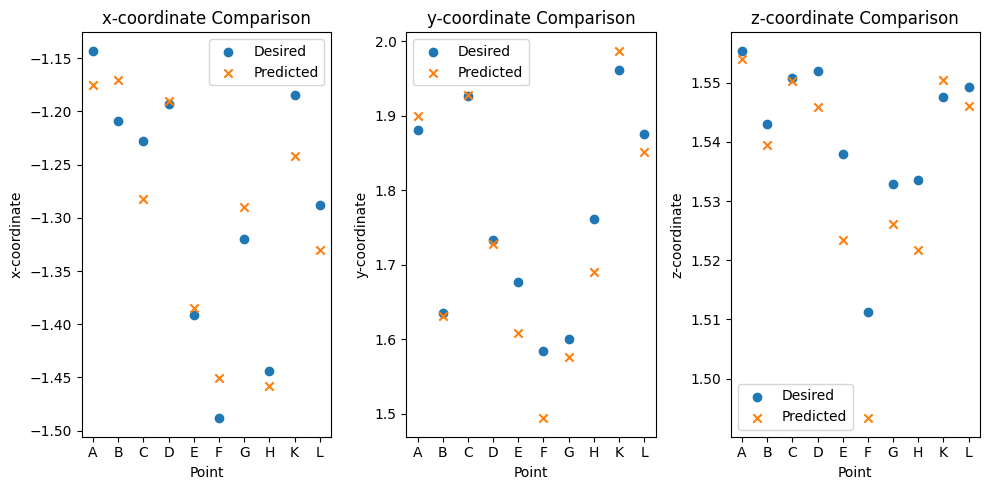

In [39]:
#import matplotlib.pyplot as plt

# Define point names (A, B, C, ...)
points = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L']

# Define coordinates (desired and predicted)
desired_x = [-1.143, -1.2089, -1.2281, -1.1929, -1.3912, -1.4884, -1.3195, -1.4437, -1.1849, -1.2881]
predicted_x = [-1.175445, -1.1705, -1.28198, -1.18991, -1.3846, -1.4509, -1.28996, -1.4582, -1.2418, -1.3299]

desired_y = [1.8806, 1.6349, 1.9267, 1.7328, 1.6764, 1.584, 1.5999, 1.7613, 1.961, 1.8758]
predicted_y = [1.899716, 1.631034, 1.9281, 1.7285, 1.609, 1.4941, 1.5764, 1.6901, 1.9871, 1.8516]

desired_z = [1.5554, 1.543, 1.5508, 1.5519, 1.5379, 1.5113, 1.5329, 1.5336, 1.5476, 1.5492]
predicted_z = [1.55406, 1.5394, 1.5503, 1.5459, 1.5234, 1.4933, 1.5262, 1.5218, 1.5504, 1.5461]

# Create scatter plots for each coordinate
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.scatter(points, desired_x, label='Desired')
plt.scatter(points, predicted_x, label='Predicted', marker='x')
plt.xlabel('Point')
plt.ylabel('x-coordinate')
plt.title('x-coordinate Comparison')
plt.legend()

plt.subplot(132)
plt.scatter(points, desired_y, label='Desired')
plt.scatter(points, predicted_y, label='Predicted', marker='x')
plt.xlabel('Point')
plt.ylabel('y-coordinate')
plt.title('y-coordinate Comparison')
plt.legend()

plt.subplot(133)
plt.scatter(points, desired_z, label='Desired')
plt.scatter(points, predicted_z, label='Predicted', marker='x')
plt.xlabel('Point')
plt.ylabel('z-coordinate')
plt.title('z-coordinate Comparison')
plt.legend()

plt.tight_layout()
plt.show()


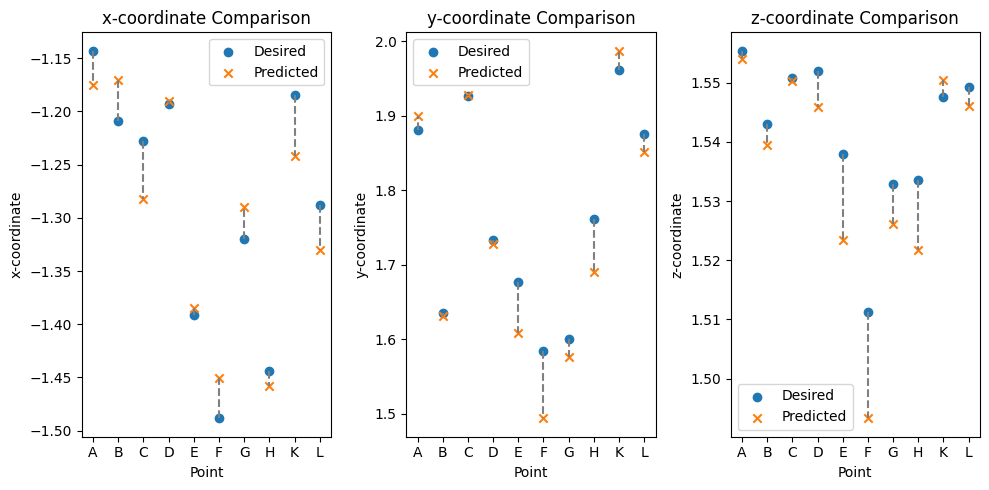

In [40]:
# Create scatter plots with connecting lines
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.scatter(points, desired_x, label='Desired')
plt.scatter(points, predicted_x, label='Predicted', marker='x')
for i in range(len(points)):
    plt.plot([points[i], points[i]], [desired_x[i], predicted_x[i]], color='grey', linestyle='--')
plt.xlabel('Point')
plt.ylabel('x-coordinate')
plt.title('x-coordinate Comparison')
plt.legend()

plt.subplot(132)
plt.scatter(points, desired_y, label='Desired')
plt.scatter(points, predicted_y, label='Predicted', marker='x')
for i in range(len(points)):
    plt.plot([points[i], points[i]], [desired_y[i], predicted_y[i]], color='grey', linestyle='--')
plt.xlabel('Point')
plt.ylabel('y-coordinate')
plt.title('y-coordinate Comparison')
plt.legend()

plt.subplot(133)
plt.scatter(points, desired_z, label='Desired')
plt.scatter(points, predicted_z, label='Predicted', marker='x')
for i in range(len(points)):
    plt.plot([points[i], points[i]], [desired_z[i], predicted_z[i]], color='grey', linestyle='--')
plt.xlabel('Point')
plt.ylabel('z-coordinate')
plt.title('z-coordinate Comparison')
plt.legend()

plt.tight_layout()
plt.show()


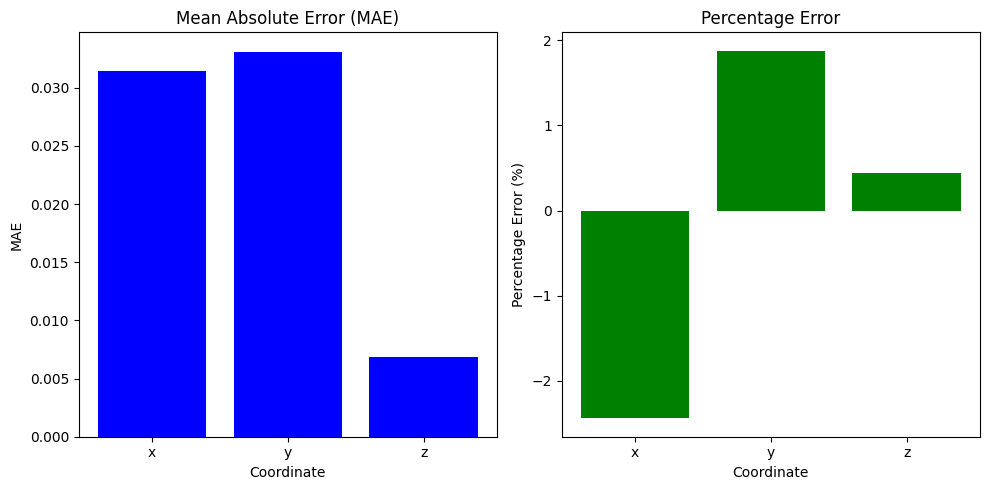

In [42]:
import matplotlib.pyplot as plt

# Define coordinates (x, y, z)
coordinates = ['x', 'y', 'z']

# Define MAE values and Percentage Error values
mae_values = [0.0314555, 0.0330982, 0.006834 ]
percentage_error_values = [-2.4405487,   1.87701748,  0.44337468]

# Create subplots for MAE and Percentage Error
plt.figure(figsize=(10, 5))

# MAE subplot
plt.subplot(121)
plt.bar(coordinates, mae_values, color='blue')
plt.xlabel('Coordinate')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE)')

# Percentage Error subplot
plt.subplot(122)
plt.bar(coordinates, percentage_error_values, color='green')
plt.xlabel('Coordinate')
plt.ylabel('Percentage Error (%)')
plt.title('Percentage Error')

plt.tight_layout()
plt.show()

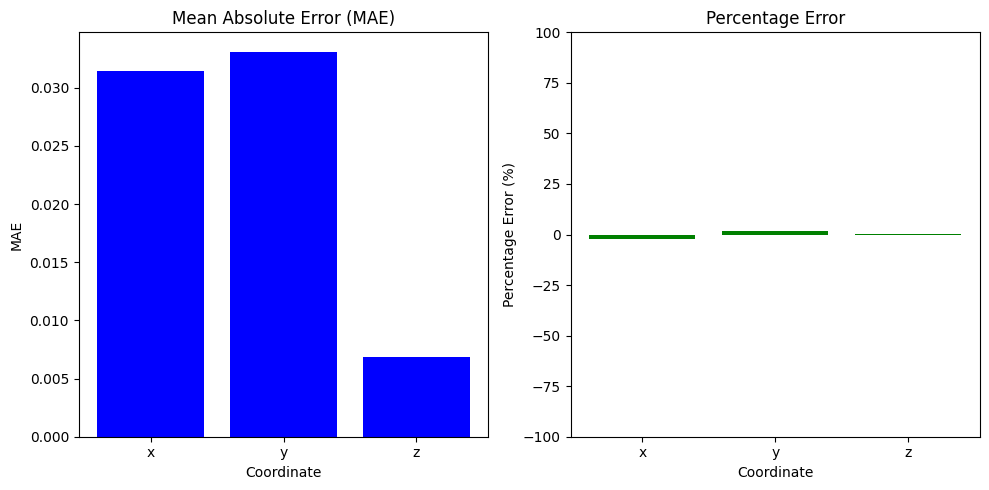

In [45]:
import matplotlib.pyplot as plt

# Define coordinates (x, y, z)
coordinates = ['x', 'y', 'z']

# Define MAE values and Percentage Error values
mae_values = [0.0314555, 0.0330982, 0.006834]
percentage_error_values = [-2.4405487, 1.87701748, 0.44337468]

# Create subplots for MAE and Percentage Error
plt.figure(figsize=(10, 5))

# MAE subplot
plt.subplot(121)
plt.bar(coordinates, mae_values, color='blue')
plt.xlabel('Coordinate')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE)')

# Percentage Error subplot
plt.subplot(122)
plt.bar(coordinates, percentage_error_values, color='green')
plt.xlabel('Coordinate')
plt.ylabel('Percentage Error (%)')
plt.title('Percentage Error')
plt.ylim(-100, 100)  # Set y-axis limits to -100% to 0%

plt.tight_layout()
plt.show()


the Support Vector Machine (SVM) seems to be the best-performing model in this context.

In [ ]:
motor_angles_pred = models[2][1].predict(X_test)
print(motor_angles_pred)

[[ 2.21231534 -0.59907217 -2.1914004   0.32469772]
 [-0.13141304 -2.30047432  0.37482047  2.33119152]
 [ 1.87053862  0.63400971 -1.90686907 -0.80284427]
 [ 0.68984901 -1.50465445 -0.55108458  1.42638696]
 [-1.40191104 -0.25170812  1.5593979   0.57463558]
 [-2.84920706 -0.34880703  3.10398097  0.93672466]
 [-1.32989705 -1.64933531  1.59367411  1.92981443]
 [-1.19751682  1.04868019  1.25189744 -0.74370308]
 [ 2.4945739   0.52597799 -2.54113538 -0.78374997]
 [ 0.97232123  0.73424924 -0.9871271  -0.7701447 ]]


In [ ]:
pred_motor_degrees = np.degrees(motor_angles_pred)
print(pred_motor_degrees)

[[ 126.75633166  -34.32430701 -125.55799389   18.60380901]
 [  -7.52941234 -131.80746919   21.47563083  133.56743511]
 [ 107.17396844   36.32608066 -109.25554956  -45.99958834]
 [  39.52543694  -86.21034959  -31.57482071   81.72595255]
 [ -80.32358593  -14.42181294   89.34691846   32.92419369]
 [-163.24753946  -19.98517087  177.84500949   53.67036939]
 [ -76.19748793  -94.49995229   91.31080057  110.57022223]
 [ -68.61265991   60.08494888   71.72843959  -42.61104743]
 [ 142.92855619   30.13631893 -145.59633268  -44.90556556]
 [  55.70990286   42.06938273  -56.55821692  -44.12604103]]


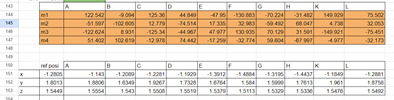

In [24]:
import numpy as np

# Define the desired and predicted coordinates as NumPy arrays
desired_coordinates = np.array([
    [-1.143, -1.2089, -1.2281, -1.1929, -1.3912, -1.4884, -1.3195, -1.4437, -1.1849, -1.2881],
    [1.8806, 1.6349, 1.9267, 1.7328, 1.6764, 1.584, 1.5999, 1.7613, 1.961, 1.8758],
    [1.5554, 1.543, 1.5508, 1.5519, 1.5379, 1.5113, 1.5329, 1.5336, 1.5476, 1.5492]
])

predicted_coordinates = np.array([
    [-1.1714, -1.1686, -1.278, -1.1895, -1.3735, -1.4462, -1.2819, -1.45495, -1.2385, -1.3173],
    [1.8996, 1.6281, 1.9402, 1.7274, 1.6169, 1.4884, 1.5277, 1.6996, 1.9896, 1.8628],
    [1.5546, 1.5389, 1.5488, 1.5466, 1.5268, 1.4942, 1.57295, 1.5245, 1.5493, 1.5473]
])

# Calculate Absolute Errors
absolute_errors = np.abs(desired_coordinates - predicted_coordinates)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(absolute_errors, axis=1)

# Calculate Percentage Error
mean_desired_values = np.mean(desired_coordinates, axis=1)
percentage_error = (mae / mean_desired_values) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Percentage Error: {percentage_error}")


Mean Absolute Error (MAE): [0.031355 0.03753  0.009315]
Percentage Error: [-2.43275117  2.12834734  0.60433643]


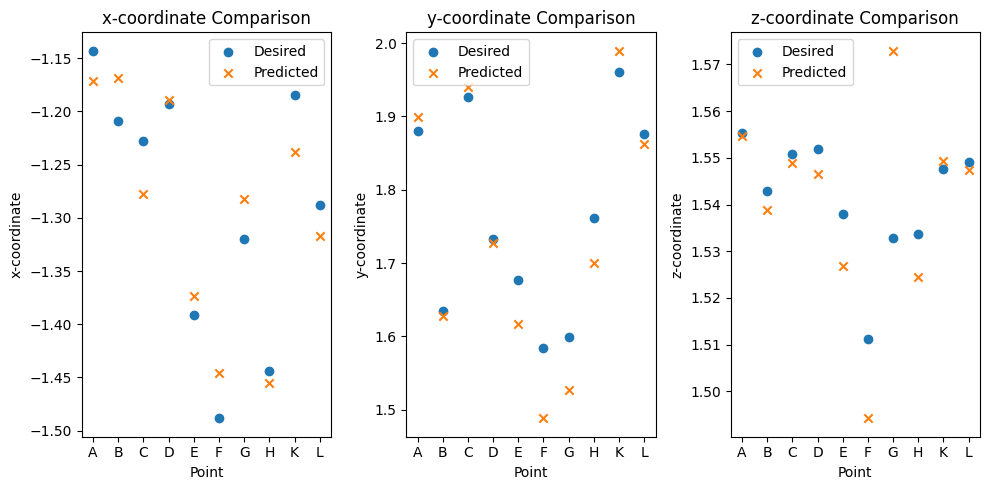

In [25]:
import matplotlib.pyplot as plt

# Define point names (A, B, C, ...)
points = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K', 'L']

# Define coordinates (desired and predicted)
desired_x = [-1.143, -1.2089, -1.2281, -1.1929, -1.3912, -1.4884, -1.3195, -1.4437, -1.1849, -1.2881]
predicted_x = [-1.1714, -1.1686, -1.278, -1.1895, -1.3735, -1.4462, -1.2819, -1.45495, -1.2385, -1.3173]

desired_y = [1.8806, 1.6349, 1.9267, 1.7328, 1.6764, 1.584, 1.5999, 1.7613, 1.961, 1.8758]
predicted_y = [1.8996, 1.6281, 1.9402, 1.7274, 1.6169, 1.4884, 1.5277, 1.6996, 1.9896, 1.8628]

desired_z = [1.5554, 1.543, 1.5508, 1.5519, 1.5379, 1.5113, 1.5329, 1.5336, 1.5476, 1.5492]
predicted_z = [1.5546, 1.5389, 1.5488, 1.5466, 1.5268, 1.4942, 1.57295, 1.5245, 1.5493, 1.5473]

# Create scatter plots for each coordinate
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.scatter(points, desired_x, label='Desired')
plt.scatter(points, predicted_x, label='Predicted', marker='x')
plt.xlabel('Point')
plt.ylabel('x-coordinate')
plt.title('x-coordinate Comparison')
plt.legend()

plt.subplot(132)
plt.scatter(points, desired_y, label='Desired')
plt.scatter(points, predicted_y, label='Predicted', marker='x')
plt.xlabel('Point')
plt.ylabel('y-coordinate')
plt.title('y-coordinate Comparison')
plt.legend()

plt.subplot(133)
plt.scatter(points, desired_z, label='Desired')
plt.scatter(points, predicted_z, label='Predicted', marker='x')
plt.xlabel('Point')
plt.ylabel('z-coordinate')
plt.title('z-coordinate Comparison')
plt.legend()

plt.tight_layout()
plt.show()


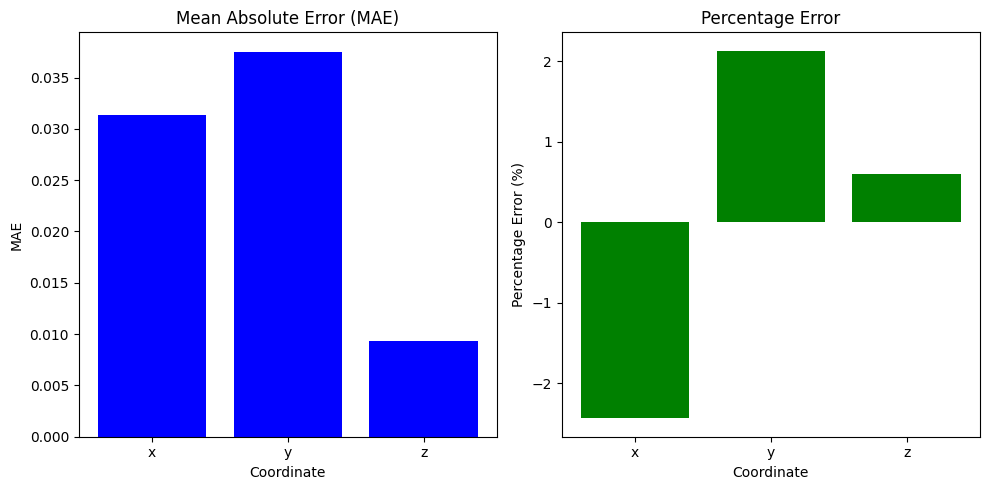

In [26]:
import matplotlib.pyplot as plt

# Define coordinates (x, y, z)
coordinates = ['x', 'y', 'z']

# Define MAE values and Percentage Error values
mae_values = [0.031355, 0.03753, 0.009315]
percentage_error_values = [-2.43275117, 2.12834734, 0.60433643]

# Create subplots for MAE and Percentage Error
plt.figure(figsize=(10, 5))

# MAE subplot
plt.subplot(121)
plt.bar(coordinates, mae_values, color='blue')
plt.xlabel('Coordinate')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE)')

# Percentage Error subplot
plt.subplot(122)
plt.bar(coordinates, percentage_error_values, color='green')
plt.xlabel('Coordinate')
plt.ylabel('Percentage Error (%)')
plt.title('Percentage Error')

plt.tight_layout()
plt.show()


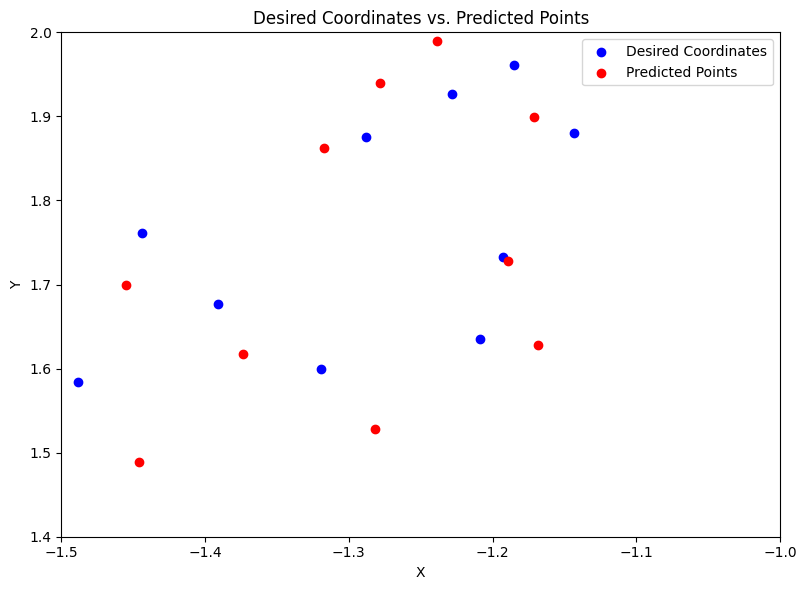

In [ ]:
import matplotlib.pyplot as plt

# Define the coordinates and predicted points
desired_coordinates = [
    [-1.143, 1.8806],
    [-1.2089, 1.6349],
    [-1.2281, 1.9267],
    [-1.1929, 1.7328],
    [-1.3912, 1.6764],
    [-1.4884, 1.584],
    [-1.3195, 1.5999],
    [-1.4437, 1.7613],
    [-1.1849, 1.961],
    [-1.2881, 1.8758]
]

predicted_xy = [
    [-1.1714, 1.8996],
    [-1.1686, 1.6281],
    [-1.278, 1.9402],
    [-1.1895, 1.7274],
    [-1.3735, 1.6169],
    [-1.4462, 1.4884],
    [-1.2819, 1.5277],
    [-1.45495, 1.6996],
    [-1.2385, 1.9896],
    [-1.3173, 1.8628]
]

# Extract x and y coordinates for plotting
desired_x, desired_y = zip(*desired_coordinates)
predicted_x, predicted_y = zip(*predicted_xy)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(desired_x, desired_y, color='blue', label='Desired Coordinates')
plt.scatter(predicted_x, predicted_y, color='red', label='Predicted Points')

# Set axis labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Desired Coordinates vs. Predicted Points')

# Set a tight layout and legend
plt.tight_layout()
plt.legend()

# Set the axis limits for a close zoom
plt.xlim(-1.5, -1)
plt.ylim(1.4, 2.0)

# Show the plot
plt.show()


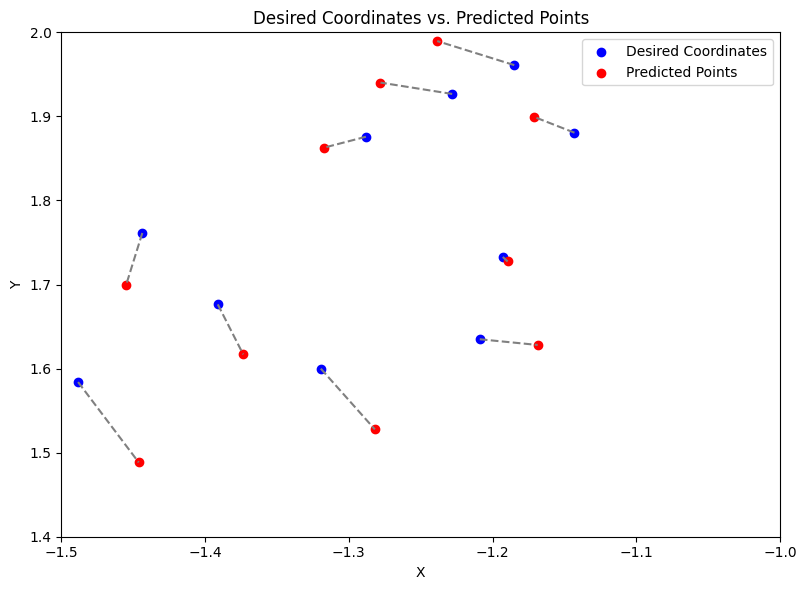

In [ ]:
import matplotlib.pyplot as plt

# Define the coordinates and predicted points
desired_coordinates = [
    [-1.143, 1.8806],
    [-1.2089, 1.6349],
    [-1.2281, 1.9267],
    [-1.1929, 1.7328],
    [-1.3912, 1.6764],
    [-1.4884, 1.584],
    [-1.3195, 1.5999],
    [-1.4437, 1.7613],
    [-1.1849, 1.961],
    [-1.2881, 1.8758]
]

predicted_xy = [
    [-1.1714, 1.8996],
    [-1.1686, 1.6281],
    [-1.278, 1.9402],
    [-1.1895, 1.7274],
    [-1.3735, 1.6169],
    [-1.4462, 1.4884],
    [-1.2819, 1.5277],
    [-1.45495, 1.6996],
    [-1.2385, 1.9896],
    [-1.3173, 1.8628]
]

# Extract x and y coordinates for plotting
desired_x, desired_y = zip(*desired_coordinates)
predicted_x, predicted_y = zip(*predicted_xy)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(desired_x, desired_y, color='blue', label='Desired Coordinates')
plt.scatter(predicted_x, predicted_y, color='red', label='Predicted Points')

# Connect corresponding points with lines
for i in range(len(desired_x)):
    plt.plot([desired_x[i], predicted_x[i]], [desired_y[i], predicted_y[i]], color='gray', linestyle='--')

# Set axis labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Desired Coordinates vs. Predicted Points')

# Set a tight layout and legend
plt.tight_layout()
plt.legend()

# Set the axis limits for a close zoom
plt.xlim(-1.5, -1)
plt.ylim(1.4, 2.0)

# Show the plot
plt.show()


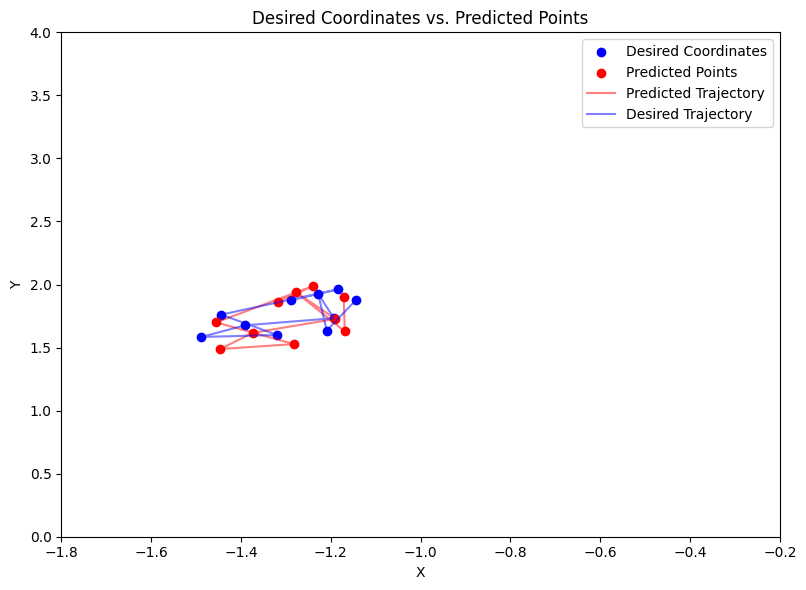

In [ ]:
import matplotlib.pyplot as plt

# Define the coordinates and predicted points
desired_coordinates = [
    [-1.143, 1.8806],
    [-1.2089, 1.6349],
    [-1.2281, 1.9267],
    [-1.1929, 1.7328],
    [-1.3912, 1.6764],
    [-1.4884, 1.584],
    [-1.3195, 1.5999],
    [-1.4437, 1.7613],
    [-1.1849, 1.961],
    [-1.2881, 1.8758]
]

predicted_xy = [
    [-1.1714, 1.8996],
    [-1.1686, 1.6281],
    [-1.278, 1.9402],
    [-1.1895, 1.7274],
    [-1.3735, 1.6169],
    [-1.4462, 1.4884],
    [-1.2819, 1.5277],
    [-1.45495, 1.6996],
    [-1.2385, 1.9896],
    [-1.3173, 1.8628]
]

# Extract x and y coordinates for plotting
desired_x, desired_y = zip(*desired_coordinates)
predicted_x, predicted_y = zip(*predicted_xy)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(desired_x, desired_y, color='blue', label='Desired Coordinates')
plt.scatter(predicted_x, predicted_y, color='red', label='Predicted Points')

# Set axis labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Desired Coordinates vs. Predicted Points')

# Connect all predicted points to visualize the predicted trajectory
plt.plot(predicted_x, predicted_y, color='red', alpha=0.5, label='Predicted Trajectory')

# Connect all desired points to visualize the desired trajectory
plt.plot(desired_x, desired_y, color='blue', alpha=0.5, label='Desired Trajectory')

# Set a tight layout and legend
plt.tight_layout()
plt.legend()

# Set the axis limits to -5
plt.xlim(-1.8, -0.2)
plt.ylim(0, 4)

# Show the plot
plt.show()


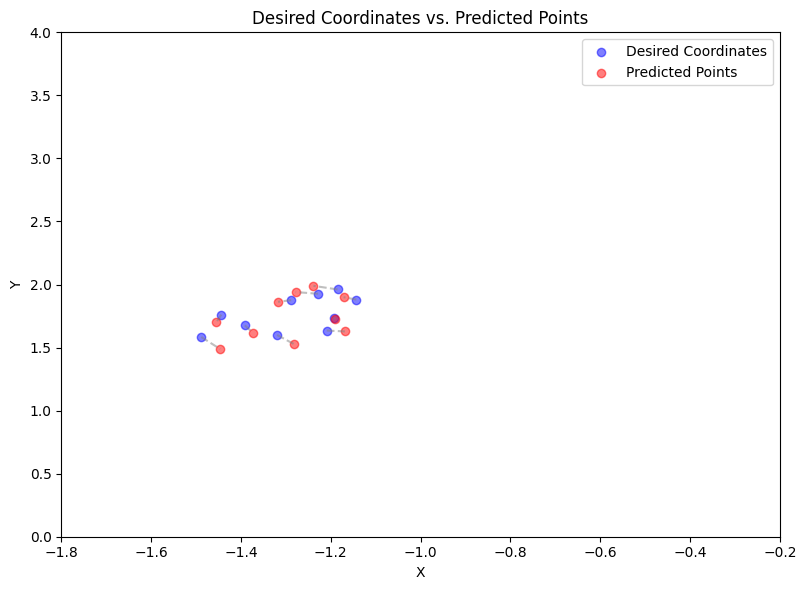

In [ ]:
import matplotlib.pyplot as plt

# Define the coordinates and predicted points
desired_coordinates = [
    [-1.143, 1.8806],
    [-1.2089, 1.6349],
    [-1.2281, 1.9267],
    [-1.1929, 1.7328],
    [-1.3912, 1.6764],
    [-1.4884, 1.584],
    [-1.3195, 1.5999],
    [-1.4437, 1.7613],
    [-1.1849, 1.961],
    [-1.2881, 1.8758]
]

predicted_xy = [
    [-1.1714, 1.8996],
    [-1.1686, 1.6281],
    [-1.278, 1.9402],
    [-1.1895, 1.7274],
    [-1.3735, 1.6169],
    [-1.4462, 1.4884],
    [-1.2819, 1.5277],
    [-1.45495, 1.6996],
    [-1.2385, 1.9896],
    [-1.3173, 1.8628]
]

# Extract x and y coordinates for plotting
desired_x, desired_y = zip(*desired_coordinates)
predicted_x, predicted_y = zip(*predicted_xy)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(desired_x, desired_y, color='blue', label='Desired Coordinates', alpha=0.5)
plt.scatter(predicted_x, predicted_y, color='red', label='Predicted Points', alpha=0.5)

# Connect corresponding points with lines
for i in range(len(desired_x)):
    plt.plot([desired_x[i], predicted_x[i]], [desired_y[i], predicted_y[i]], color='gray', linestyle='--', alpha=0.5)

# Set axis labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Desired Coordinates vs. Predicted Points')

# Set a tight layout and legend
plt.tight_layout()
plt.legend()

# Set the axis limits to zoom out
plt.xlim(-1.8, -0.2)
plt.ylim(0, 4)

# Show the plot
plt.show()


**Defining whether data is linear or non linear since R2 score gives negative values.**

**An R2 score** (coefficient of determination) is a measure of how well a regression model predicts the variation in the dependent variable based on the independent variables. It is a value between 0 and 1, where 1 indicates a perfect fit and 0 indicates that the model does no better than simply predicting the mean of the dependent variable for all observations.

However, an R2 score can also be negative. This typically happens when the model performs worse than a horizontal line. In other words, it means that the model is a poor fit for the data.

Here are a few scenarios where you might get a negative R2 score:

***The model is a poor fit***: The model you're using is not appropriate for the data, and it performs worse than a horizontal line.

***Overfitting:*** The model may be too complex for the data, causing it to fit noise rather than the underlying pattern.

***Errors in the data***: There may be errors or outliers in the data that the model is struggling to account for.

***Inappropriate use of R2:*** R2 assumes that the model is linear, and if your relationship is not linear, R2 may not be a suitable metric.

In any case, a negative R2 score suggests that the model does not explain the variance in the data and is likely not providing meaningful predictions. It's important to investigate the model and data to understand why this is happening and consider alternative modeling approaches or data preprocessing techniques.

Determining whether a model is linear or not requires examining the relationship between the independent variables and the dependent variable. Here are some steps you can take to assess if a linear model is appropriate for your data:

***Visual Inspection:***

Create scatter plots of each independent variable against the dependent variable. Look for any obvious linear patterns. If the relationship appears to be roughly linear, a linear model might be suitable.

***Residual Plot:***

After fitting a linear model, plot the residuals (the differences between the actual and predicted values). If the residuals show a random pattern around zero, it suggests a good fit. If there's a clear pattern, it may indicate non-linearity.

***Correlation Matrix:***

Calculate the correlation coefficients between the independent variables and the dependent variable. If most of the correlations are close to 1 or -1, it suggests a linear relationship.

***Domain Knowledge:***

Consider the nature of the data and the underlying processes you're modeling. In some cases, it may be inherently non-linear, and a linear model may not be appropriate.

***Polynomial Features:***

You can try adding polynomial features to your model. This allows you to capture non-linear relationships within a linear model framework. For example, you can include squared or cubed terms of the independent variables.
Use Non-Linear Models:

If the data appears to have a non-linear relationship, consider using non-linear models like decision trees, random forests, support vector machines, or neural networks.

***Test for Linearity:***

Some statistical tests, like the Ramsey RESET test or the White test, can be used to formally test for the presence of non-linearity in a regression model.
Remember that the choice of model should be guided by a combination of empirical analysis, domain knowledge, and consideration of the underlying processes generating the data. It's important to be open to using non-linear models when appropriate.

In [ ]:
#correlation matrix
combined_df = pd.concat([X_test, y_test], axis=1)
correlation_matrix = combined_df.corr()

print("Full Correlation Matrix:")
print(correlation_matrix)


Full Correlation Matrix:
          0         1         2         0         1         2         3
0  1.000000  0.565892  0.873872  0.816685 -0.648561 -0.817221  0.646508
1  0.565892  1.000000  0.718613  0.936833  0.258865 -0.936510 -0.261465
2  0.873872  0.718613  1.000000  0.877004 -0.356965 -0.877262  0.354676
0  0.816685  0.936833  0.877004  1.000000 -0.091429 -1.000000  0.088743
1 -0.648561  0.258865 -0.356965 -0.091429  1.000000  0.092356 -0.999996
2 -0.817221 -0.936510 -0.877262 -1.000000  0.092356  1.000000 -0.089671
3  0.646508 -0.261465  0.354676  0.088743 -0.999996 -0.089671  1.000000


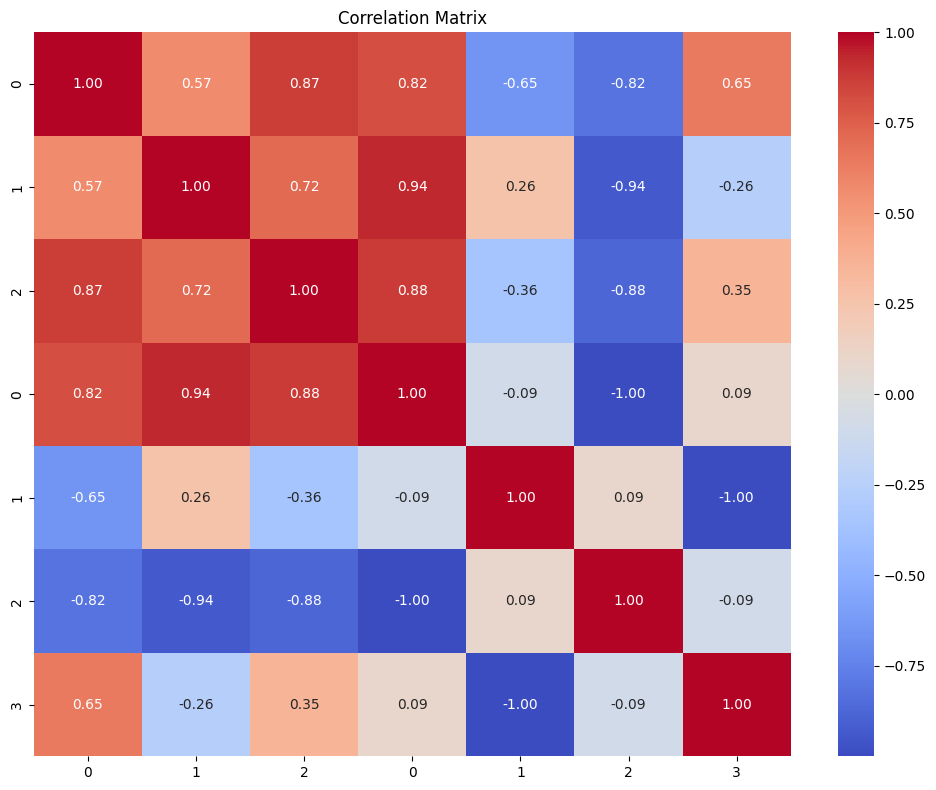

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming correlation_matrix is already calculated

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title and adjust layout
plt.title("Correlation Matrix")
plt.tight_layout()

# Show the plot
plt.show()


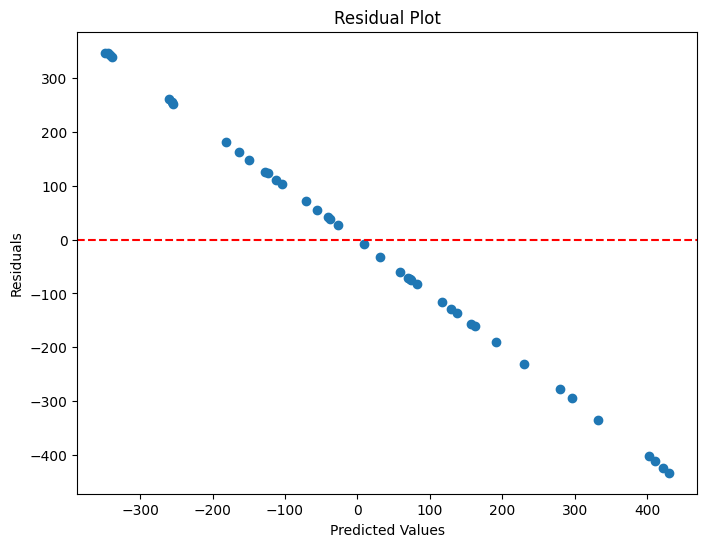

In [ ]:
# Calculate residuals
residuals = y_test - pred_motor_degrees

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(pred_motor_degrees, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

The residual plot helps you assess the assumptions of your regression model.
Ideally, the residuals should be randomly scattered around the zero line, indicating that the model is making unbiased predictions. If you observe a pattern or trend in the residuals, it suggests that there might be issues with the model.



